In [1]:
print('Welcome to python')

Welcome to python



## 📂 Step 1: Load & Clean the Data

- Import required libraries
- Load the dataset (VideoGamesSales.csv)
- Handle duplicates and missing values
- Clean and rename columns for clarity


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('E:/Projects/First Project 1234 Python/VideoGamesSales.csv')
# df=df[df.duplicated()]
df=df.drop_duplicates()
# df.info()
df['Region']=df['Region'].fillna('North')
# df=df[df['Region'].isnull()]
# df.shape[0]
# df.head(100)
# df.tail(100)
df['NA_Sales']=df['NA_Sales'].replace('[$]','', regex=True)
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'],errors='coerce')
Average_Sales=df['NA_Sales'].mean()

df['Country']=df['Country'].replace({'USA':'United States'})
df['Country']=df['Country'].str.title()
# df=df[df['Country']=='Australia']
# df.shape[0]
df=df.rename(columns={'NA_Sales':'National Sales','Global_Sales':'Global Sales','NA_Profit':'National Profit','Global_Profit':'Global Profit'})
# df.head(2)
sales_cap =df['National Sales'].quantile(0.95)
int(sales_cap)
df

Matplotlib is building the font cache; this may take a moment.


,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,29.08,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,15.85,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,15.75,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,11.27,31.37,3.381,9.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,5890,Crazy Taxi: Catch a Ride,GBA,2017,Sep,Racing,THQ,Australia,Sydney,New South Wales,West,0.21,0.30,0.063,0.090
5905,5891,MySims Party,DS,2017,Oct,Simulation,Electronic Arts,Australia,Sydney,New South Wales,West,0.15,0.30,0.045,0.090
5906,5892,Harry Potter and the Order of the Phoenix,X360,2017,Nov,Action,Electronic Arts,Australia,Sydney,New South Wales,West,0.24,0.30,0.072,0.090
5907,5893,Skylanders: SuperChargers,PS4,2017,Dec,Action,Activision,Australia,Sydney,New South Wales,West,0.17,0.30,0.051,0.090



## 📊 Step 2: Data Exploration & Visualization

We will group data by **Region** and **Country** to analyze sales patterns, 
and visualize them using bar plots.


In [14]:
# create a bar chart
National_Sales=df.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales', ascending=False)
National_Sales

,Region,Country,National Sales
9,West,United States,1020.79
2,East,United States,812.50
0,Central,United States,701.44
8,West,Australia,683.62
7,South,United States,507.48
4,North,United States,49.35
5,Other,Australia,28.21
6,South,Australia,16.30
3,North,Australia,15.24
1,East,Australia,1.35


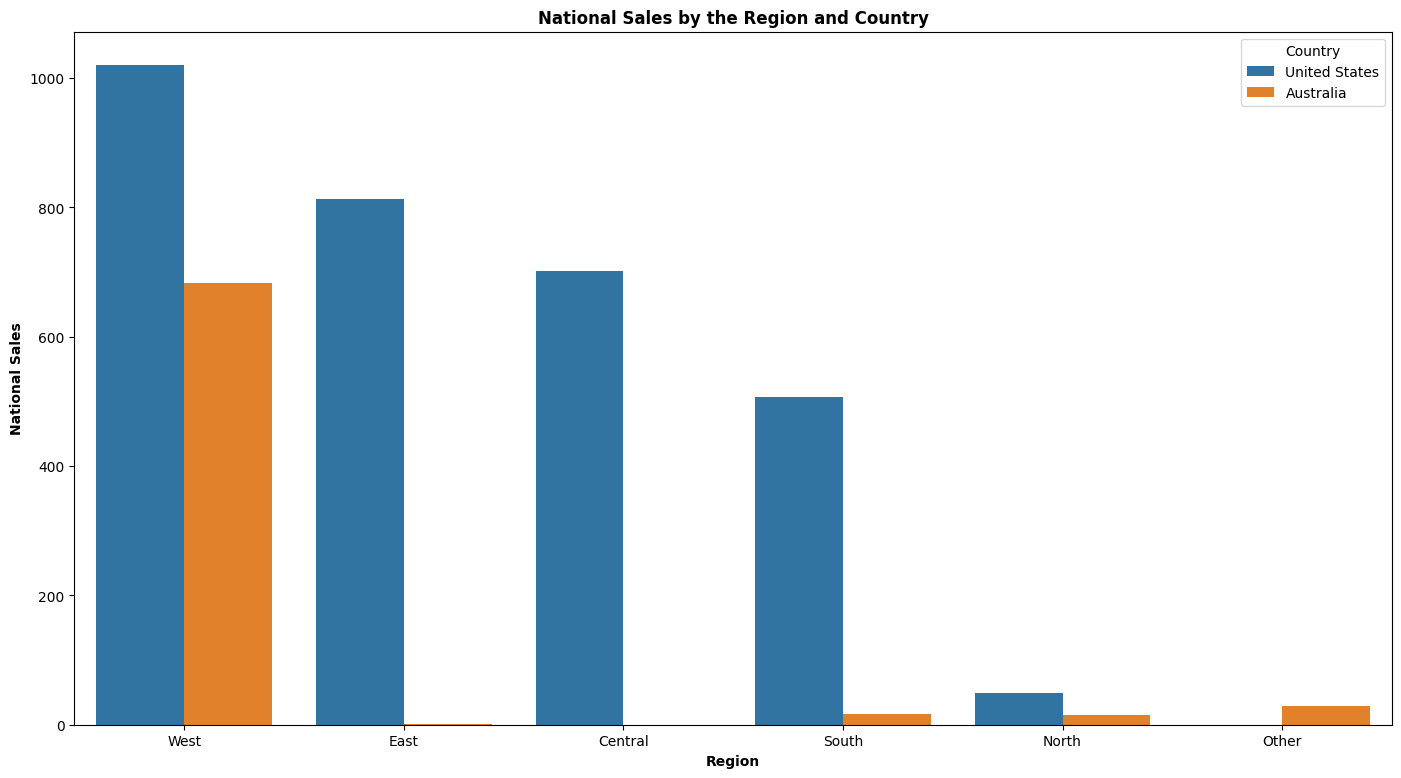

In [13]:
National_Sales=df.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales', ascending=False)
National_Sales
plt.figure(figsize=(17, 9))
sns.barplot(data=National_Sales, x='Region', y='National Sales', hue='Country')
plt.title('National Sales by the Region and Country',fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()


## 📦 Step 3: Genre Analysis by Country

Here we compare **average national sales** by **country and genre** 
using bar charts.


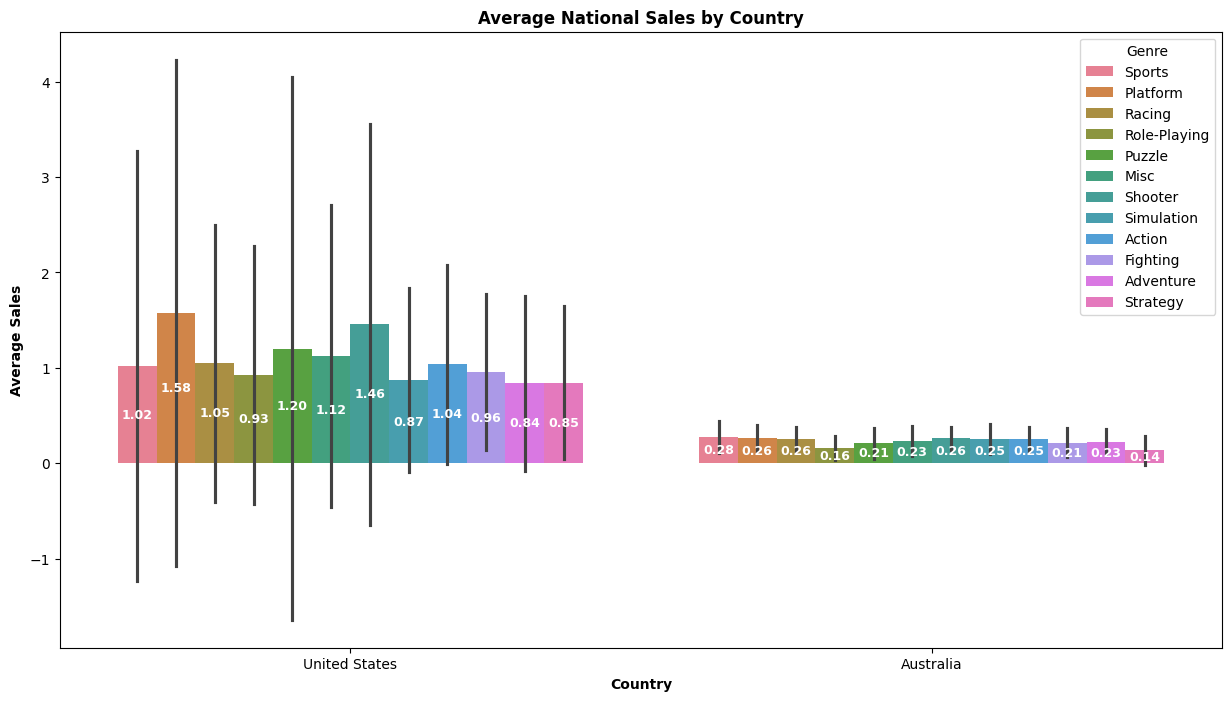

In [37]:
#create Box Plot
plt.figure(figsize=(15, 8))
ax=sns.barplot(x='Country', y='National Sales', data=df, hue='Genre', errorbar='sd')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white', fontsize=9, fontweight='bold')

plt.title('Average National Sales by Country', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Average Sales', fontweight='bold')
plt.show()

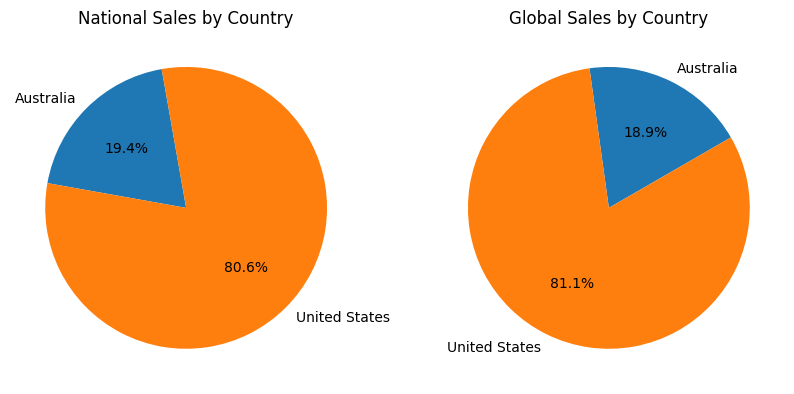

In [48]:
#CREATE A PIE CHART
sales=df.groupby(['Country'])[['National Sales', 'Global Sales']].sum().reset_index()
Country=sales['Country']
National_Sales=sales['National Sales']
Global_Sales= sales['Global Sales']

fig, axs= plt.subplots(1,2, figsize=(10,7))

axs[0].pie(National_Sales, labels=Country, autopct='%1.1f%%', startangle=100)
axs[0].set_title('National Sales by Country')

axs[1].pie(Global_Sales, labels=Country, autopct='%1.1f%%', startangle=30)
axs[1].set_title('Global Sales by Country')

plt.show()

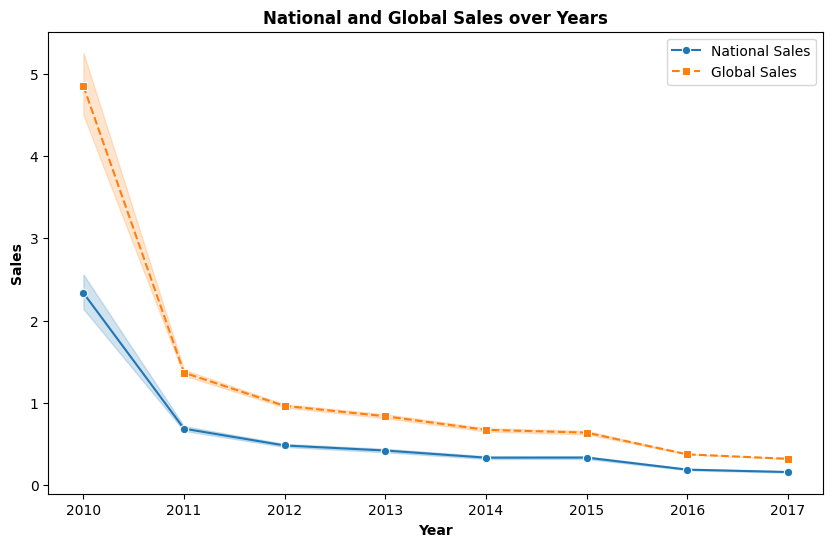

In [61]:
#create line chart


plt.figure(figsize=(10,6))

sns.lineplot(x='Year', y='National Sales', data=df, marker='o', label='National Sales')
sns.lineplot(x='Year', y='Global Sales', data=df, marker='s', linestyle='--', label='Global Sales')

plt.title('National and Global Sales over Years', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Sales', fontweight='bold')
plt.legend()
plt.show()


## ✅ Conclusion

- North America shows the highest national sales overall.
- The United States is the leading country in sales contribution.
- Popular genres like **Action** and **Shooter** dominate sales across multiple regions.
- This analysis highlights the importance of regional preferences in global gaming markets.
